## 网络请求

最简单的网络请求，发送一个 GET 请求

HTTPResponse[ByteArray[<90>], <|Headers -> 
 
>     {{Server, openresty/1.15.8.2}, {Content-Type, Application/json;charset=utf-8}, 
 
>      {Transfer-Encoding, chunked}, {Connection, keep-alive}, {Vary, Accept-Encoding}, 
 
>      {X-Powered-By, PHP/7.3.15}, {Cache-Control, no-cache, private}, 
 
>      {Date, Wed, 26 Feb 2020 13:03:16 GMT}, {X-Robots-Tag, noindex}, 
 
>      {Content-Encoding, gzip}}, StatusCode -> 200, Cookies -> {}|>, 
 
>   CharacterEncoding -> Automatic]
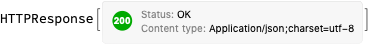

In [2]:
response = HTTPRequest["http://poetry.lightfly.cn"] // URLRead

{AbsoluteDomain, AbsolutePath, Body, BodyByteArray, BodyBytes, ContentType, Cookies, 
 
>   Domain, FormRules, Fragment, Headers, Password, Path, PathString, Port, Query, 
 
>   QueryString, Scheme, URL, User, UserAgent, Username, Method}
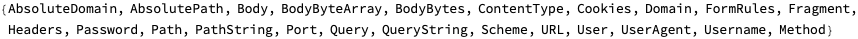

In [3]:
HTTPRequest["http://poetry.lightfly.cn"]["Properties"]

In [4]:
response[{"Body"}]

<|Body -> {"code":0,"data":{"title":"poetry api\
 
>     server","version":"0.1.0","stage":"dev"},"msg":"ok"}|>


发送一个`POST`请求

In [5]:
url = "http://poetry.lightfly.cn/login"
req = HTTPRequest[
   url, <|
    Method -> "POST", 
    "Body" -> "{}",
    "ContentType" -> "application/json"
    |>
   ];
URLRead[req, "Body"]

http://poetry.lightfly.cn/login
{"code":1000,"data":{},"msg":{"username":{"_required":"This field is\
 
>   required"},"openid":{"_required":"This field is required"}}}

In [8]:
body = response[{"Body"}]["Body"]

{"code":0,"data":{"title":"poetry api\
 
>   server","version":"0.1.0","stage":"dev"},"msg":"ok"}

In [9]:
{code, data, msg} = ImportString[body, "JSON"]

{code -> 0, data -> {title -> poetry api server, version -> 0.1.0, stage -> dev}, 
 
>   msg -> ok}

上面返回的是一个规则列表，本身是一个列表，里面定义了多个规则， 下面是将其转换成关联

In [40]:
 json = Association[ImportString[body, "JSON"]]

<|code -> 0, data -> {title -> poetry api server, version -> 0.1.0, stage -> dev}, 
 
>   msg -> ok|>

In [42]:
json["data"]

{title -> poetry api server, version -> 0.1.0, stage -> dev}